In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams

In [49]:
df = pd.read_csv('AirPassenger.csv',index_col='Year-Month',parse_dates=True)
df.head()

,Pax
Year-Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [50]:
rcParams['figure.figsize'] = 15,8

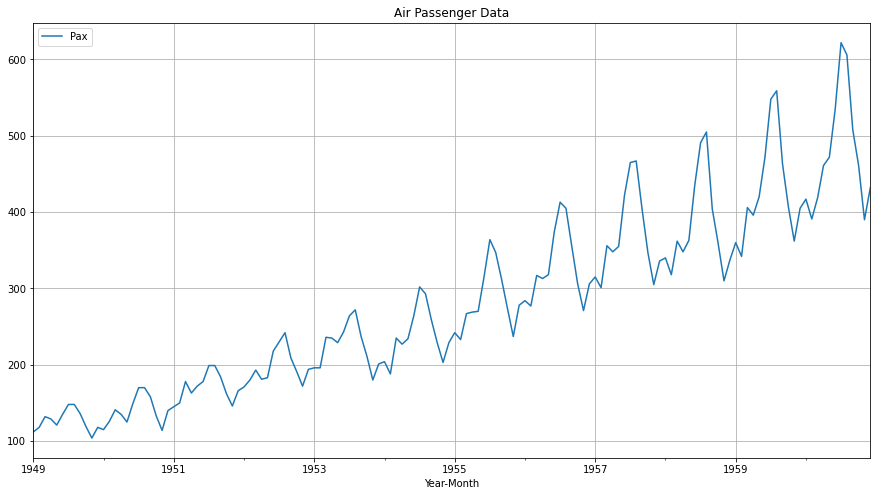

In [51]:
df.plot(title='Air Passenger Data',grid=True);

In [52]:
train = df[df.index<'1957']
test = df[df.index>='1957']

In [53]:
train.shape

(96, 1)

In [54]:
test.shape

(48, 1)

In [55]:
train.head()

,Pax
Year-Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [56]:
train.tail()

,Pax
Year-Month,
1956-08-01,405
1956-09-01,355
1956-10-01,306
1956-11-01,271
1956-12-01,306


In [57]:
test.head()

,Pax
Year-Month,
1957-01-01,315
1957-02-01,301
1957-03-01,356
1957-04-01,348
1957-05-01,355


In [58]:
from statsmodels.tsa.api import SimpleExpSmoothing, ExponentialSmoothing, Holt

In [59]:
model_SES = SimpleExpSmoothing(train,initialization_method='estimated')

C:\Users\dines\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [60]:
model_SES_autofit = model_SES.fit()

In [61]:
model_SES_autofit.params

{'smoothing_level': 0.9999999850988388,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 111.95399055092484,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [62]:
#Prediction on test set
SES_Predict = model_SES_autofit.forecast(steps=len(test))
SES_Predict

1957-01-01    305.999999
1957-02-01    305.999999
1957-03-01    305.999999
1957-04-01    305.999999
1957-05-01    305.999999
1957-06-01    305.999999
1957-07-01    305.999999
1957-08-01    305.999999
1957-09-01    305.999999
1957-10-01    305.999999
1957-11-01    305.999999
1957-12-01    305.999999
1958-01-01    305.999999
1958-02-01    305.999999
1958-03-01    305.999999
1958-04-01    305.999999
1958-05-01    305.999999
1958-06-01    305.999999
1958-07-01    305.999999
1958-08-01    305.999999
1958-09-01    305.999999
1958-10-01    305.999999
1958-11-01    305.999999
1958-12-01    305.999999
1959-01-01    305.999999
1959-02-01    305.999999
1959-03-01    305.999999
1959-04-01    305.999999
1959-05-01    305.999999
1959-06-01    305.999999
1959-07-01    305.999999
1959-08-01    305.999999
1959-09-01    305.999999
1959-10-01    305.999999
1959-11-01    305.999999
1959-12-01    305.999999
1960-01-01    305.999999
1960-02-01    305.999999
1960-03-01    305.999999
1960-04-01    305.999999


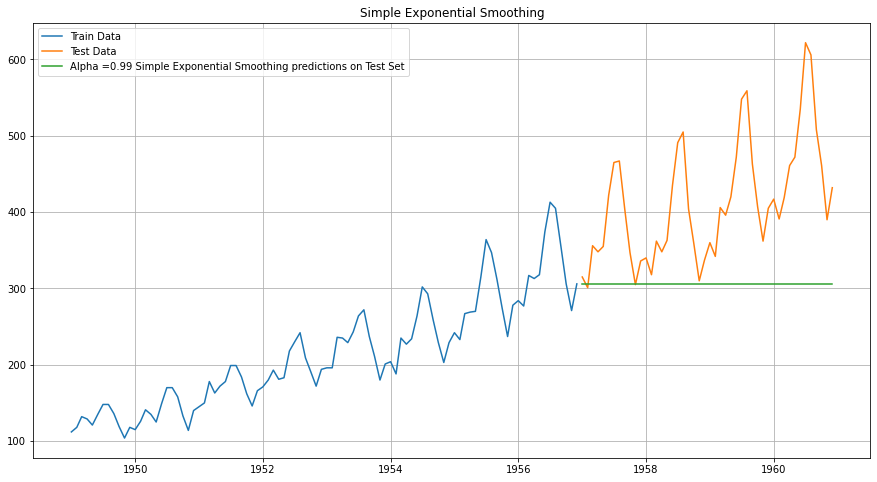

In [63]:
plt.plot(train,label='Train Data');
plt.plot(test,label='Test Data');
plt.plot(SES_Predict,label='Alpha =0.99 Simple Exponential Smoothing predictions on Test Set');

plt.legend(loc='best');
plt.grid();
plt.title('Simple Exponential Smoothing');

In [64]:
import statsmodels.tools.eval_measures as em
from sklearn.metrics import  mean_squared_error

In [65]:
mean_squared_error(test,SES_Predict,squared=False)

132.60993908995977

In [66]:
result_df = pd.DataFrame({'TestRMSE' : mean_squared_error(test,SES_Predict,squared=False)},index=['Alpha=0.99,SES'])
result_df

,TestRMSE
"Alpha=0.99,SES",132.609939


In [67]:
#Double exponential Smoothing
model_DES = Holt(train,initialization_method='estimated')

C:\Users\dines\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [68]:
model_DES_autofit = model_DES.fit()

In [69]:
DES_Predict = model_DES_autofit.forecast(steps=len(test))
DES_Predict

1957-01-01    307.895780
1957-02-01    309.955346
1957-03-01    312.014911
1957-04-01    314.074477
1957-05-01    316.134042
1957-06-01    318.193608
1957-07-01    320.253173
1957-08-01    322.312739
1957-09-01    324.372304
1957-10-01    326.431870
1957-11-01    328.491436
1957-12-01    330.551001
1958-01-01    332.610567
1958-02-01    334.670132
1958-03-01    336.729698
1958-04-01    338.789263
1958-05-01    340.848829
1958-06-01    342.908395
1958-07-01    344.967960
1958-08-01    347.027526
1958-09-01    349.087091
1958-10-01    351.146657
1958-11-01    353.206222
1958-12-01    355.265788
1959-01-01    357.325353
1959-02-01    359.384919
1959-03-01    361.444485
1959-04-01    363.504050
1959-05-01    365.563616
1959-06-01    367.623181
1959-07-01    369.682747
1959-08-01    371.742312
1959-09-01    373.801878
1959-10-01    375.861444
1959-11-01    377.921009
1959-12-01    379.980575
1960-01-01    382.040140
1960-02-01    384.099706
1960-03-01    386.159271
1960-04-01    388.218837


In [70]:
model_DES_autofit.params

{'smoothing_level': 0.995,
 'smoothing_trend': 0.0001,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 118.46666666666661,
 'initial_trend': 2.0606060606060694,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

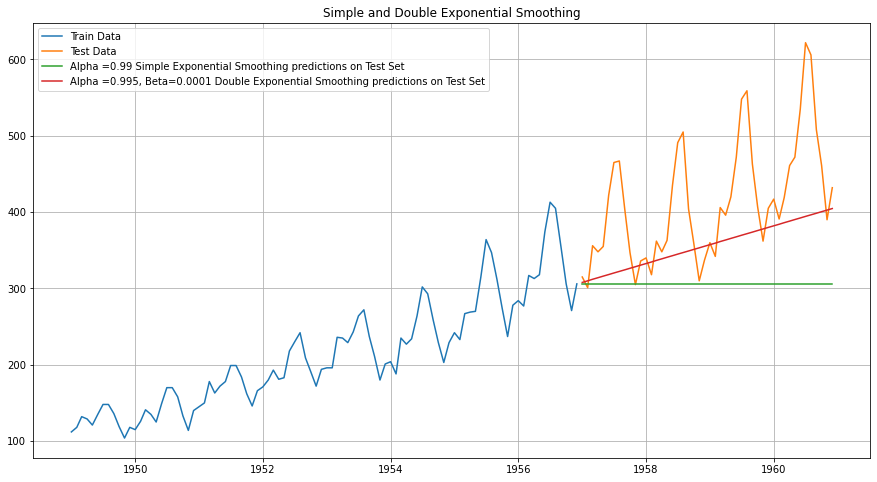

In [71]:
plt.plot(train,label='Train Data');
plt.plot(test,label='Test Data');
plt.plot(SES_Predict,label='Alpha =0.99 Simple Exponential Smoothing predictions on Test Set');
plt.plot(DES_Predict,label='Alpha =0.995, Beta=0.0001 Double Exponential Smoothing predictions on Test Set');

plt.legend(loc='best');
plt.grid();
plt.title('Simple and Double Exponential Smoothing');

In [72]:
mean_squared_error(test,DES_Predict,squared=False)

87.45546145655499

In [73]:
result_df2 = pd.DataFrame({'TestRMSE' : mean_squared_error(test,DES_Predict,squared=False)},index=['Alpha=0.995,Beta=0.0001,DES'])
result_df2

,TestRMSE
"Alpha=0.995,Beta=0.0001,DES",87.455461


In [74]:
result_df = pd.concat([result_df,result_df2])
result_df

,TestRMSE
"Alpha=0.99,SES",132.609939
"Alpha=0.995,Beta=0.0001,DES",87.455461


In [75]:
#Holt-Winters - ETS(A, A, A) - Holt Winter's linear method with additive errors
model_TES = ExponentialSmoothing(train,initialization_method='estimated',trend='additive',seasonal='additive')

C:\Users\dines\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [76]:
model_TES = model_TES.fit()

In [77]:
TES_Predict = model_TES.forecast(len(test))

In [78]:
model_TES.params

{'smoothing_level': 0.2546483570878885,
 'smoothing_trend': 8.411774259305766e-12,
 'smoothing_seasonal': 0.7453516428892357,
 'damping_trend': nan,
 'initial_level': 118.76841013859445,
 'initial_trend': 2.332830152885944,
 'initial_seasons': array([ -9.10156319,  -3.50406003,   8.96983821,   3.69740383,
         -5.06824307,   9.0308772 ,  21.24330835,  18.81862566,
          4.68932241, -14.1153608 , -28.55479694, -11.94777572]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [79]:
TES_Predict

1957-01-01    319.235246
1957-02-01    311.528357
1957-03-01    350.278659
1957-04-01    346.984945
1957-05-01    351.844989
1957-06-01    403.925662
1957-07-01    440.566741
1957-08-01    427.446405
1957-09-01    376.628089
1957-10-01    329.767420
1957-11-01    296.561189
1957-12-01    341.114647
1958-01-01    347.229207
1958-02-01    339.522319
1958-03-01    378.272621
1958-04-01    374.978907
1958-05-01    379.838951
1958-06-01    431.919624
1958-07-01    468.560703
1958-08-01    455.440367
1958-09-01    404.622050
1958-10-01    357.761381
1958-11-01    324.555151
1958-12-01    369.108609
1959-01-01    375.223169
1959-02-01    367.516281
1959-03-01    406.266583
1959-04-01    402.972869
1959-05-01    407.832912
1959-06-01    459.913586
1959-07-01    496.554665
1959-08-01    483.434329
1959-09-01    432.616012
1959-10-01    385.755343
1959-11-01    352.549113
1959-12-01    397.102571
1960-01-01    403.217131
1960-02-01    395.510242
1960-03-01    434.260545
1960-04-01    430.966830


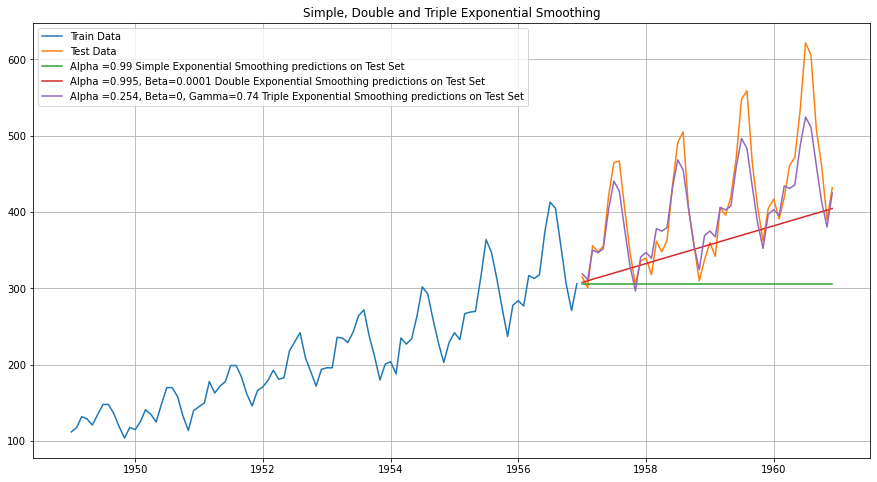

In [80]:
plt.plot(train,label='Train Data');
plt.plot(test,label='Test Data');
plt.plot(SES_Predict,label='Alpha =0.99 Simple Exponential Smoothing predictions on Test Set');
plt.plot(DES_Predict,label='Alpha =0.995, Beta=0.0001 Double Exponential Smoothing predictions on Test Set');
plt.plot(TES_Predict,label='Alpha =0.254, Beta=0, Gamma=0.74 Triple Exponential Smoothing predictions on Test Set');

plt.legend(loc='best');
plt.grid();
plt.title('Simple, Double and Triple Exponential Smoothing');

In [81]:
result_df3 = pd.DataFrame({'TestRMSE' : mean_squared_error(test,TES_Predict,squared=False)},index=['Alpha=0.254,Beta=0,Gamma=0.74,TES'])
result_df3

,TestRMSE
"Alpha=0.254,Beta=0,Gamma=0.74,TES",31.900212


In [82]:
result_df = pd.concat([result_df,result_df3])
result_df

,TestRMSE
"Alpha=0.99,SES",132.609939
"Alpha=0.995,Beta=0.0001,DES",87.455461
"Alpha=0.254,Beta=0,Gamma=0.74,TES",31.900212


In [83]:
#Holt-Winters - ETS(A, A, M) - Holt Winter's linear method 
model_TES_am = ExponentialSmoothing(train,initialization_method='estimated',trend='additive',seasonal='multiplicative')

C:\Users\dines\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [84]:
model_TES_am = model_TES_am.fit()

In [85]:
model_TES_am.params

{'smoothing_level': 0.74122349736698,
 'smoothing_trend': 0.0,
 'smoothing_seasonal': 0.0,
 'damping_trend': nan,
 'initial_level': 109.54439624762993,
 'initial_trend': 2.0100762473424982,
 'initial_seasons': array([1.01453552, 0.9927355 , 1.13793623, 1.09961416, 1.09239682,
        1.23237661, 1.36203811, 1.33295193, 1.17157707, 1.01779626,
        0.88465997, 1.00019223]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [86]:
TES_Predict_am = model_TES_am.forecast(len(test))
TES_Predict_am

1957-01-01    312.899560
1957-02-01    308.171547
1957-03-01    355.533060
1957-04-01    345.770145
1957-05-01    345.696478
1957-06-01    392.471215
1957-07-01    436.501917
1957-08-01    429.859801
1957-09-01    380.173448
1957-10-01    332.317859
1957-11-01    290.626129
1957-12-01    330.590939
1958-01-01    337.371085
1958-02-01    332.117236
1958-03-01    382.981123
1958-04-01    372.293845
1958-05-01    372.046089
1958-06-01    422.197266
1958-07-01    469.355523
1958-08-01    462.011822
1958-09-01    408.432958
1958-10-01    356.868036
1958-11-01    311.964936
1958-12-01    354.716490
1959-01-01    361.842610
1959-02-01    356.062924
1959-03-01    410.429187
1959-04-01    398.817544
1959-05-01    398.395700
1959-06-01    451.923318
1959-07-01    502.209128
1959-08-01    494.163842
1959-09-01    436.692469
1959-10-01    381.418213
1959-11-01    333.303744
1959-12-01    378.842042
1960-01-01    386.314135
1960-02-01    380.008613
1960-03-01    437.877250
1960-04-01    425.341244


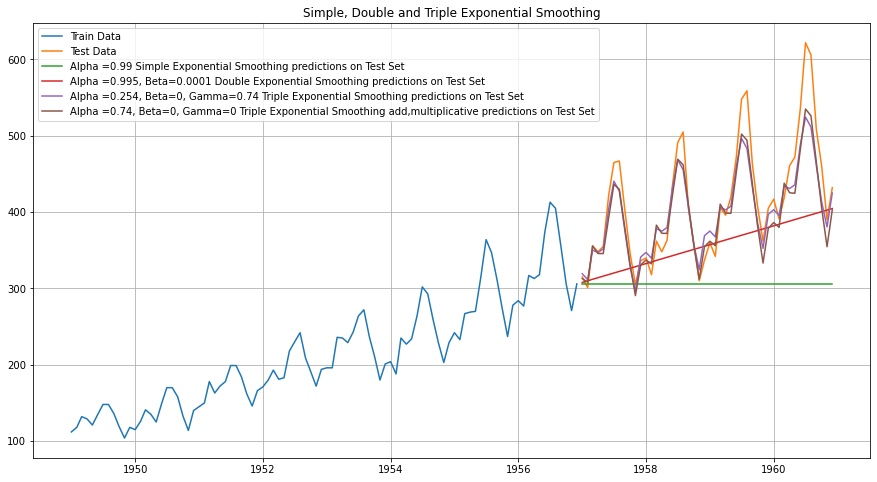

In [88]:
plt.plot(train,label='Train Data');
plt.plot(test,label='Test Data');
plt.plot(SES_Predict,label='Alpha =0.99 Simple Exponential Smoothing predictions on Test Set');
plt.plot(DES_Predict,label='Alpha =0.995, Beta=0.0001 Double Exponential Smoothing predictions on Test Set');
plt.plot(TES_Predict,label='Alpha =0.254, Beta=0, Gamma=0.74 Triple Exponential Smoothing predictions on Test Set');
plt.plot(TES_Predict_am,label='Alpha =0.74, Beta=0, Gamma=0 Triple Exponential Smoothing add,multiplicative predictions on Test Set');

plt.legend(loc='best');
plt.grid();
plt.title('Simple, Double and Triple Exponential Smoothing');

In [91]:
result_df4 = pd.DataFrame({'TestRMSE' : mean_squared_error(test,TES_Predict_am,squared=False)},index=['Alpha=0.74,Beta=0,Gamma=0,TES_am'])
result_df4

,TestRMSE
"Alpha=0.74,Beta=0,Gamma=0,TES_am",31.383437


In [92]:
result_df = pd.concat([result_df,result_df4])
result_df

,TestRMSE
"Alpha=0.99,SES",132.609939
"Alpha=0.995,Beta=0.0001,DES",87.455461
"Alpha=0.254,Beta=0,Gamma=0.74,TES",31.900212
"Alpha=0.74,Beta=0,Gamma=0,TES_am",31.383437
